## Question 1.1

## Importing Required Libraries:

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

## Reading the Dataset:

In [6]:
df=pd.read_csv("classification.csv")
data=df

## Dataset Plot:

<AxesSubplot:xlabel='age', ylabel='interest'>

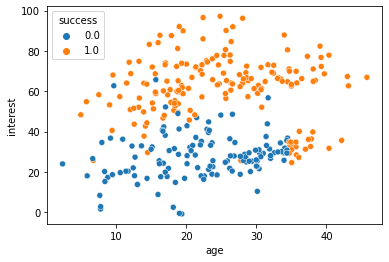

In [7]:
colors = np.where(df['success']==1.0,'r','g')
sns.scatterplot(data=df, x="age", y="interest", hue="success")

In [12]:
X = df.drop([df.columns[-1]], axis = 1)
y = df[df.columns[-1]]

## Least Square Method Implementation:

In [13]:
m = X.shape[0]
X = np.c_[np.ones((m, 1)), X]
beta = np.linalg.inv(X.T @ X) @ (X.T @ y)

## Least Square Decision Boundary Plot:

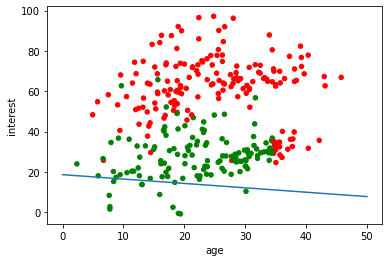

In [14]:
line_x = np.linspace(0,50)
line_y = -beta[0] / beta[2] - (beta[1] / beta[2]) * line_x
df.plot.scatter(x="age",y="interest",c=colors)
plt.plot(line_x, line_y)
plt.show()

### Comment: From the above plot we can clearly observe that the least square decision boundary can not able to separate the class properly. It is evident from the above plot that the algorithm is trying to separate the red coloured points to the one side of the boundary to minimize the sequared error for the red colored point class but in the mean time it can not fully recognised the fact that most of the green colored data is going to the same side of the decision boundary. It is biased towards one class

## Question 1.2:

## Implementing Logistics Regression:

In [16]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        self.sig_func=0
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)   
            self.sig_func=h
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
        
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [17]:
X = df.drop([df.columns[-1]], axis = 1)
X1=df.drop([df.columns[-1]], axis = 1)
for column in X:
    X[column] = (X[column] - X[column].mean()) / X[column].std()
y = df[df.columns[-1]]
model = LogisticRegression(lr=0.01, num_iter=500)
model.fit(X, y)
print(model.theta)

[0.21657187 0.19553612 1.13320056]


## 2.4 Decision Boundary Plot using Logistic Regression:

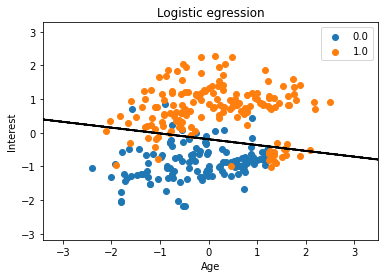

In [18]:
X_set,y_set = X.to_numpy(),y
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1,stop=X_set[:,0].max()+1,step=0.01),
                    np.arange(start=X_set[:,1].min() - 1,stop=X_set[:,1].max()+1,step=0.01))
plt.contour(X1,X2,model.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),colors='black')
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y ==j,0],X_set[y == j,1],label=j)
plt.title('Logistic egression')
plt.xlabel('Age')
plt.ylabel('Interest')
plt.legend()
plt.show()

### Comment: From the above plot diagram, it is observed that the logistics regression algorithm is generating better decision boundary compared to least square classification. Here both the class points are evenly separated by the boundary. Although there are some missclassified data in both side of the boundary but overall it gives us a much better idea of the two class data points.

## 2.3 Sigmoid Function 3D Plot:

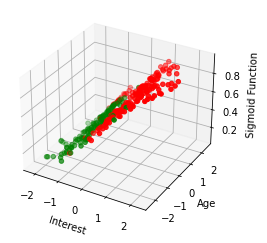

In [19]:
X = df.drop([df.columns[-1]], axis = 1)
for column in X:
    X[column] = (X[column] - X[column].mean()) / X[column].std()
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X['interest'],X['age'],model.sig_func,c=colors)
ax.set_xlabel('Interest')
ax.set_ylabel('Age')
ax.set_zlabel('Sigmoid Function')
plt.show()

## 2.5 Linear Discriminant Boundary Analysis:

In [20]:
class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None
    
    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)
        
        #Scatter classes
        mean_total = np.mean(X, axis= 0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))

        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis= 0)
            SW += (X_c - mean_c).T @ (X_c - mean_c)

            samples_inclass = X_c.shape[0]
            mean_difference = (mean_c - mean_total).reshape((n_features, 1))
            SB += samples_inclass * mean_difference @ mean_difference.T

        vector = np.linalg.inv(SW) @ SB
        eigenvalues, eigenvectors = np.linalg.eig(vector)
        eigenvectors = eigenvectors.T
        indices = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[indices]
        eigenvectors = eigenvectors[indices]
        self.linear_discriminants = eigenvectors[:self.n_components]

    def transform(self, X):
        return X @ self.linear_discriminants.T

In [21]:
X = df.drop([df.columns[-1]], axis = 1)
y = df[df.columns[-1]]
#X = standard_Scaler.fit_transform(X)
for column in X:
    X[column] = (X[column] - X[column].mean()) / X[column].std()
X = X.to_numpy()
y = y.to_numpy()
lda = LDA(n_components= 2)
lda.fit(X, y)
X_transformed = lda.transform(X)

## LDA Plot:

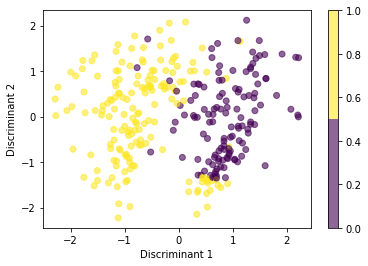

In [24]:
x1 = X_transformed[:, 0]
x2 = X_transformed[:, 1]

plt.scatter(x1, x2, c= y, alpha= 0.6,
            cmap= plt.cm.get_cmap('viridis', 2))
plt.xlabel('Discriminant 1')
plt.ylabel('Discriminant 2')
plt.colorbar()
plt.show()

### Comment: From the above plot, we can see that due to some overlapping data point linear discriminat algorithm fails to correctly classifiy the point. Although some other class points are coming in a particular class points but as the majority comes into play, the algorithm classify those as the majority class points. So this algorithm so how able to tries to differenciate the above two classes but there is still some misclassified data available in the plot.

## 2.6  and 2.7 Logistics Regression for Non-Linear Decision Boundary:

In [25]:
def mapFeature(X1, X2, degree):
    res = np.ones(X1.shape[0])
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    
    return res
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def costFunc(theta, X, y):
    m = y.shape[0]
    z = X.dot(theta)
    h = sigmoid(z)
    term1 = y * np.log(h)
    term2 = (1- y) * np.log(1 - h)
    J = -np.sum(term1 + term2, axis = 0) / m
    return J 

def plotDecisionBoundary(theta,degree, axes):
    u = np.linspace(-2.5, 1.5, 50)
    v = np.linspace(-2.5, 1.5, 50)
    U,V = np.meshgrid(u,v)
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    X_poly = mapFeature(U, V, degree)
    Z = X_poly.dot(theta)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U,V,Z,levels=[0],cmap= 'autumn')
    axes.legend(labels=['0.0', '1.0', 'Decision Boundary'])
    return cs



In [26]:

X = df.drop([df.columns[-1]], axis = 1)
y = df[df.columns[-1]]
for column in X:
    X[column] = (X[column] - X[column].mean()) / X[column].std()
#X = standard_Scaler.fit_transform(X)
degree = 2
X_poly = mapFeature(X.iloc[:, 0], X.iloc[:, 1], degree)
initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)
from scipy.optimize import minimize
res = minimize(costFunc, initial_theta, args=(X_poly, y))
theta = res.x
#print(theta)

## Non-linear Decision Boundary for Degree 2:

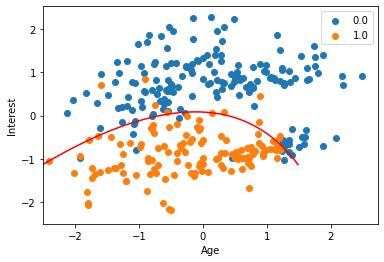

In [27]:
pos = df['success'] == 1
neg = df['success'] == 0
fig, axes = plt.subplots();
axes.set_xlabel('Age')
axes.set_ylabel('Interest')
axes.scatter(X.loc[pos, 'age'], X.loc[pos, 'interest'],label='0.0')
axes.scatter(X.loc[neg, 'age'], X.loc[neg, 'interest'],label='1.0')
#axes.legend(title='Legend', loc = 'best' )
plotDecisionBoundary(theta, degree, axes)

## Non-linear Decision Boundary for Degree 3:

<ipython-input-25-80903141e342>:16: RuntimeWarning: divide by zero encountered in log
  term2 = (1- y) * np.log(1 - h)


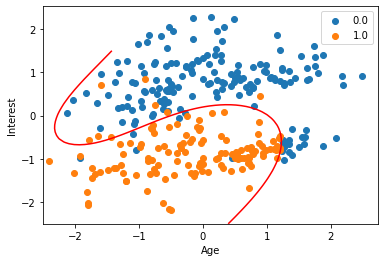

In [28]:
X = df.drop([df.columns[-1]], axis = 1)
y = df[df.columns[-1]]
for column in X:
    X[column] = (X[column] - X[column].mean()) / X[column].std()
#X = standard_Scaler.fit_transform(X)
degree = 3
X_poly = mapFeature(X.iloc[:, 0], X.iloc[:, 1], degree)
initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)
from scipy.optimize import minimize
res = minimize(costFunc, initial_theta, args=(X_poly, y))
theta = res.x
pos = df['success'] == 1
neg = df['success'] == 0
fig, axes = plt.subplots();
axes.set_xlabel('Age')
axes.set_ylabel('Interest')
axes.scatter(X.loc[pos, 'age'], X.loc[pos, 'interest'],label='0.0')
axes.scatter(X.loc[neg, 'age'], X.loc[neg, 'interest'],label='1.0')
#axes.legend(title='Legend', loc = 'best' )
plotDecisionBoundary(theta, degree, axes)

## Non-linear Decision Boundary for Degree 4:

<ipython-input-25-80903141e342>:16: RuntimeWarning: divide by zero encountered in log
  term2 = (1- y) * np.log(1 - h)


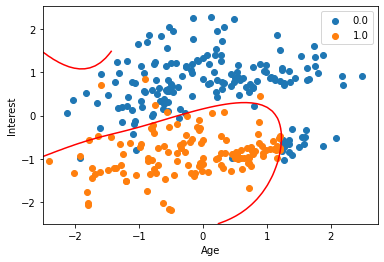

In [29]:
X = df.drop([df.columns[-1]], axis = 1)
y = df[df.columns[-1]]
for column in X:
    X[column] = (X[column] - X[column].mean()) / X[column].std()
#X = standard_Scaler.fit_transform(X)
degree = 4
X_poly = mapFeature(X.iloc[:, 0], X.iloc[:, 1], degree)
initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)
from scipy.optimize import minimize
res = minimize(costFunc, initial_theta, args=(X_poly, y))
theta = res.x
pos = df['success'] == 1
neg = df['success'] == 0
fig, axes = plt.subplots();
axes.set_xlabel('Age')
axes.set_ylabel('Interest')
axes.scatter(X.loc[pos, 'age'], X.loc[pos, 'interest'],label='0.0')
axes.scatter(X.loc[neg, 'age'], X.loc[neg, 'interest'],label='1.0')
#axes.legend(title='Legend', loc = 'best' )
plotDecisionBoundary(theta, degree, axes)

## Non-linear Decision Boundary for Degree 5:

<ipython-input-25-80903141e342>:16: RuntimeWarning: divide by zero encountered in log
  term2 = (1- y) * np.log(1 - h)
<ipython-input-25-80903141e342>:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-25-80903141e342>:15: RuntimeWarning: divide by zero encountered in log
  term1 = y * np.log(h)


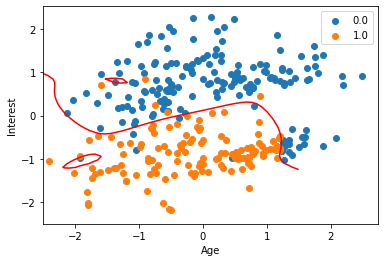

In [30]:
X = df.drop([df.columns[-1]], axis = 1)
y = df[df.columns[-1]]
for column in X:
    X[column] = (X[column] - X[column].mean()) / X[column].std()
#X = standard_Scaler.fit_transform(X)
degree = 5
X_poly = mapFeature(X.iloc[:, 0], X.iloc[:, 1], degree)
initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)
from scipy.optimize import minimize
res = minimize(costFunc, initial_theta, args=(X_poly, y))
theta = res.x
pos = df['success'] == 1
neg = df['success'] == 0
fig, axes = plt.subplots();
axes.set_xlabel('Age')
axes.set_ylabel('Interest')
axes.scatter(X.loc[pos, 'age'], X.loc[pos, 'interest'],label='0.0')
axes.scatter(X.loc[neg, 'age'], X.loc[neg, 'interest'],label='1.0')
#axes.legend(title='Legend', loc = 'best' )
plotDecisionBoundary(theta, degree, axes)

###  Comment: From the above four plot we can observed that for degree value of 2 and 3 the obtained non-linear decision boundarys some how able to create a boundary among the two class points. Here the number of misclassified data points are very less compared to linear discriminant analysis and normal logistic regression algorithm. In my point of view he degree 2 boundary give very optimal solution according to the plot although degree 3 boundary also can work fine but is it restricting the boundary of the one class more tightly.